In [3]:
!pip install py_vollib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install datetime


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import yfinance as yf
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv
import datetime as dt

def calculate_option_price(stock_price, strike_price, risk_free_rate, time_to_expiry, volatility, option_type):
    if option_type == 'call':
        return bs('c', stock_price, strike_price, risk_free_rate, time_to_expiry, volatility)
    elif option_type == 'put':
        return bs('p', stock_price, strike_price, risk_free_rate, time_to_expiry, volatility)

def calculate_implied_volatility(stock_price, strike_price, risk_free_rate, time_to_expiry, option_price, option_type):
    if option_type == 'call':
        return iv(option_price, stock_price, strike_price, risk_free_rate, time_to_expiry, 'c')
    elif option_type == 'put':
        return iv(option_price, stock_price, strike_price, risk_free_rate, time_to_expiry, 'p')

def short_straddle(symbol, expiration_date, stock_price, strike_price, risk_free_rate, volatility):
    # Retrieve stock price using yfinance
    

In [12]:
stock = yf.download("AAPL",start="2020-01-01",end="2023-06-01")
print(stock)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.249023   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.536888   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.114883   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.771027   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.941658   
...                ...         ...         ...         ...         ...   
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.608261   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.756714   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.193420   
2023-05-30  176.960007  178.990005  176.570007  177.300003  177.060898   
2023-05-31  177.330002  179.350006  176.759

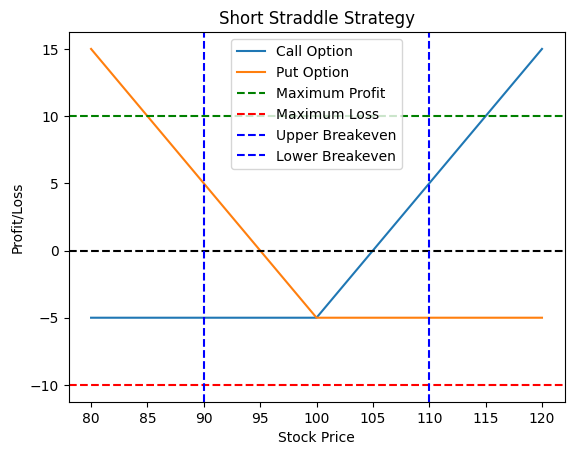

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_option_price(stock_price, strike_price, option_type, premium):
    if option_type == 'call':
        return max(stock_price - strike_price, 0) - premium
    elif option_type == 'put':
        return max(strike_price - stock_price, 0) - premium

def plot_short_straddle(stock_prices, strike_price, premium):
    call_option_prices = [calculate_option_price(stock_price, strike_price, 'call', premium) for stock_price in stock_prices]
    put_option_prices = [calculate_option_price(stock_price, strike_price, 'put', premium) for stock_price in stock_prices]
    total_premium = 2 * premium

    max_profit = total_premium
    max_loss = np.inf

    breakeven_upper = strike_price + total_premium
    breakeven_lower = strike_price - total_premium

    fig, ax = plt.subplots()
    ax.plot(stock_prices, call_option_prices, label='Call Option')
    ax.plot(stock_prices, put_option_prices, label='Put Option')
    ax.axhline(0, color='black', linestyle='--')
    ax.axhline(total_premium, color='g', linestyle='--', label='Maximum Profit')
    ax.axhline(-total_premium, color='r', linestyle='--', label='Maximum Loss')
    ax.axvline(breakeven_upper, color='b', linestyle='--', label='Upper Breakeven')
    ax.axvline(breakeven_lower, color='b', linestyle='--', label='Lower Breakeven')
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Profit/Loss')
    ax.legend()
    plt.title('Short Straddle Strategy')
    plt.show()

# Example usage
stock_prices = np.arange(80, 121, 1)
strike_price = 100.0
premium = 5.0

plot_short_straddle(stock_prices, strike_price, premium)
